In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return 2 - 4*x + np.exp(x)

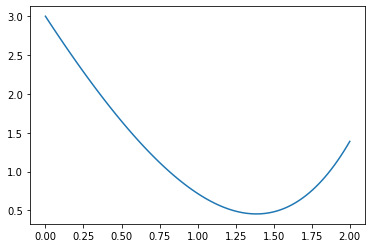

In [ ]:
x = np.linspace(0, 2, 100)
y = f(x)

fig = plt.figure()
plt.plot(x,y)
plt.show()

In [26]:
def interval_halving(f, a, b, eps=0.01):
    
    count_fn_calls = 0
    delta = b-a
    x_m = a + delta/2
    y_m = f(x_m)
    count_fn_calls += 1
    
    while delta > eps:
        x_l = a + delta/4
        y_l = f(x_l)
        count_fn_calls += 1
        x_u = b - delta/4
        y_u = f(x_u)
        count_fn_calls += 1
        
        if y_l < y_m:
            b = x_m
            x_m = x_l
            y_m = y_l
            delta = b-a
        elif y_u < y_m:
            a = x_m
            x_m = x_u
            y_m = y_u
            delta = b-a
        else:
            a = x_l
            b = x_u
            delta = b-a
            
    print(count_fn_calls)
            
    return [a,b]

In [27]:
interval_halving(f, -2, 4)

21


[1.3837890625, 1.3896484375]

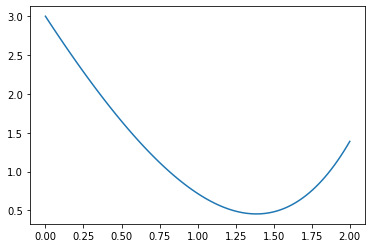

In [10]:
x = np.linspace(0, 2, 100)
y = f(x)

fig = plt.figure()
plt.plot(x,y)
plt.show()

In [19]:
def f_new(x):
    return x*np.exp(-x)

In [23]:
def interval_halving_maximum(f, a, b, eps=0.01):
    
    count_fn_calls = 0
    
    delta = b-a
    x_m = a + delta/2
    y_m = f(x_m)
    count_fn_calls += 1
    
    while delta > eps:
        x_l = a + delta/4
        y_l = f(x_l)
        count_fn_calls += 1
        x_u = b - delta/4
        y_u = f(x_u)
        count_fn_calls += 1
        
        if y_l > y_m:
            b = x_m
            x_m = x_l
            y_m = y_l
            delta = b-a
        elif y_u > y_m:
            a = x_m
            x_m = x_u
            y_m = y_u
            delta = b-a
        else:
            a = x_l
            b = x_u
            delta = b-a
            
    print(count_fn_calls)
            
    return [a,b]

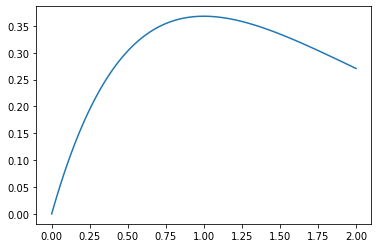

In [24]:
x = np.linspace(0, 2, 100)
y = f_new(x)

fig = plt.figure()
plt.plot(x,y)
plt.show()

In [25]:
interval_halving_maximum(f_new, 0, 2)

17


[0.99609375, 1.00390625]

In [14]:
def f_multivariate(x,y):
    return x**2 + y**2 + 1

In [15]:
def interval_halving_two_variables(f, a, b, var, fixed_var, eps=0.01):
    
    delta = b-a
    mid = a + delta/2
    
    if var == "x":
        z_m = f(mid, fixed_var)
    else:
        z_m = f(fixed_var, mid)
    
    while delta > eps:
        lower = a + delta/4
        upper = b - delta/4

        if var == "x":
            z_l = f(lower, fixed_var)
            z_u = f(upper, fixed_var)
        else:
            z_l = f(fixed_var, lower)
            z_u = f(fixed_var, upper)
        
        if z_l < z_m:
            b = mid
            mid = lower
            z_m = z_l
            delta = b-a
        elif z_u < z_m:
            a = mid
            mid = upper
            z_m = z_u
            delta = b-a
        else:
            a = lower
            b = upper
            delta = b-a
            
            
    return [a,b]

In [16]:
optimal_x = interval_halving_two_variables(f_multivariate, -10, 10, var = "x", fixed_var = 0)
optimal_y = interval_halving_two_variables(f_multivariate, -10, 10, var = "y", fixed_var = (optimal_x[0] + optimal_x[1])/2)

print("Optimal x:", optimal_x)
print("Optimal y:", optimal_y)

Optimal x: [-0.0048828125, 0.0048828125]
Optimal y: [-0.0048828125, 0.0048828125]
